# KNN & PCA

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%matplotlib inline

In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
iris['DESCR'][:193]

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive att'

In [7]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
type(iris['data'])

numpy.ndarray

In [12]:
iris['data'].shape

(150, 4)

In [13]:
iris['target'].shape

(150,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=10)

In [15]:
X_train.shape

(112, 4)

In [16]:
X_test.shape

(38, 4)

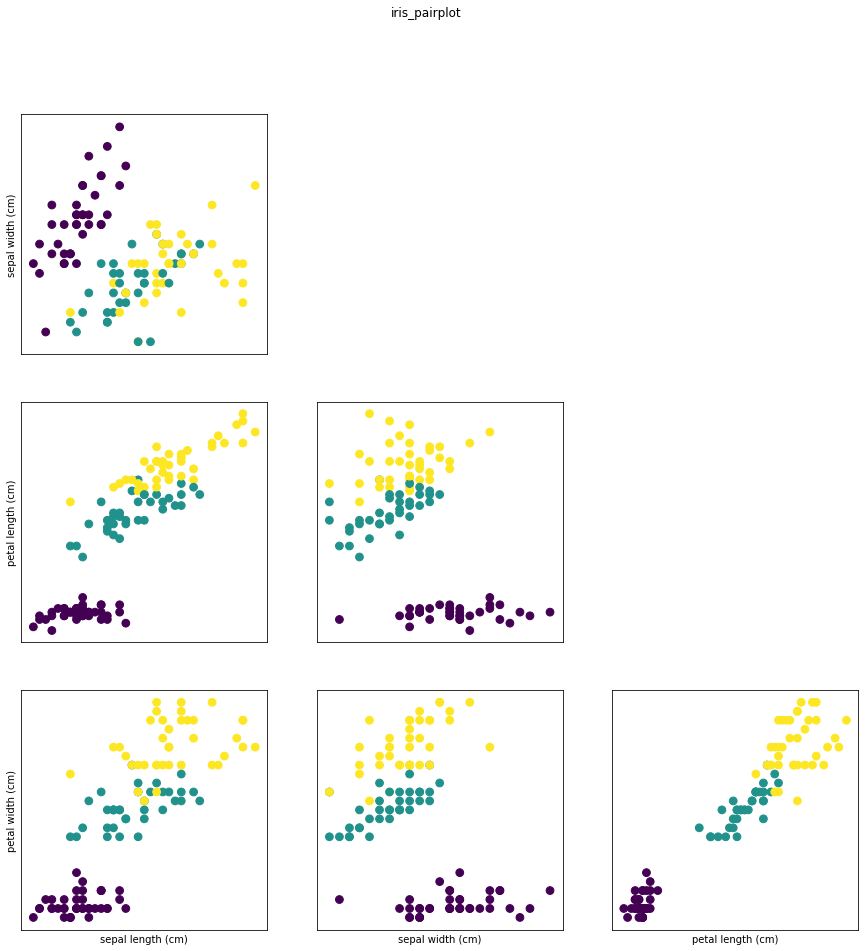

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

### Principal Component Analysis

Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

PCA is a dimensionality reduction or data compression method. The goal is dimension reduction and there is no guarantee that the dimensions are interpretable (a fact often not appreciated by (amateur) statisticians).

In [18]:
y = iris.target
X = iris.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

In [19]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])    
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

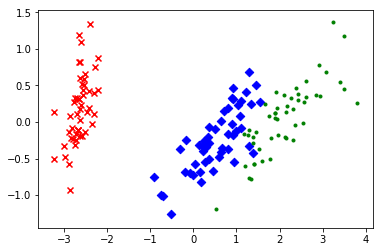

In [20]:
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

## KNN

In [21]:
model = KNeighborsClassifier(n_neighbors=1)

In [22]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
model.score(X_test, y_test)

0.9736842105263158

In [24]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [25]:
np.mean(y_pred == y_test)

0.9736842105263158

i.e. our model is expected to have an accuracy of 97%!

### Prediction

In [26]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [27]:
prediction = model.predict(X_new)
prediction

array([0])

In [28]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

Our model predicts that this new iris belongs to the class 0, meaning its species is Setosa.

### References

1. ftp://statgen.ncsu.edu/pub/thorne/molevoclass/AtchleyOct19.pdf
2. Mastering Machine Learning with scikit-learn by Gavin Hackeling